In [31]:
import os
os.getcwd()

'c:\\Users\\Nikhitha\\Documents\\Visual Studio 2019\\python'

In [32]:
line = "*"
total = 10
while len(line)<=total:
    print(line)
    line+="*"
while len(line)>0:
    print(line)
    line=line[:-1]

*
**
***
****
*****
******
*******
********
*********
**********
***********
**********
*********
********
*******
******
*****
****
***
**
*


In [33]:
line = "*"
space = " "
total = 6
row = 1
while row<=total:
    for x in range(total-row):
        print(space,end="")
    for x in range(row):
        print("*",end="")
    row+=1
    print()

     *
    **
   ***
  ****
 *****
******


In [34]:
total = 5
space = " "
for row in range(1,total+1):
    for x in range(total-row):
        print(space,end="")
    for _ in range(2*row-1):
        print("*",end="")
    print()
for row in reversed(range(1,total)):
    for _ in range(total-row):
        print(space,end="")
    for star in range(2*row-1):
        print("*",end="")
    print()


    *
   ***
  *****
 *******
*********
 *******
  *****
   ***
    *


In [1]:
import urllib.request

urllib.request.urlretrieve(
    'https://hub.jovian.ml/wp-content/uploads/2020/08/climate.csv', 
    'climate.txt')


('climate.txt', <http.client.HTTPMessage at 0x1bcc88acbe0>)

In [36]:
import numpy as np
climate_data = np.genfromtxt("climate.txt",delimiter=",",skip_header=1)
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [2]:
import numpy as np
print(np.__version__)
null=np.zeros(10)
print(null)
null[6]=1
print(null)

1.19.1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [3]:
import pandas as pd
from urllib.request import urlretrieve
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')
covid_df = pd.read_csv('italy-covid-daywise.csv')
covid_df.describe()




,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [4]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [5]:
covid_df.shape

(248, 4)

In [6]:
covid_df.new_cases
#can also be written as covid_df["new_cases"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [7]:
covid_df[["date","new_cases"]]

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [8]:
covid_df.at[246,"new_cases"] #gets the element at 246th index in new_cases
covid_df["new_cases"][246] #same func 


975.0

In [9]:
covid_df.new_tests.first_valid_index() #gets the first index with non nan value
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [10]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
195,2020-07-13,234.0,9.0,14006.0
32,2020-02-01,0.0,0.0,NaN
96,2020-04-05,4805.0,681.0,NaN
58,2020-02-27,78.0,1.0,NaN
127,2020-05-06,1075.0,236.0,37771.0
225,2020-08-12,412.0,6.0,27330.0
222,2020-08-09,347.0,13.0,22773.0
181,2020-06-29,174.0,22.0,15484.0
234,2020-08-21,840.0,6.0,44943.0
245,2020-09-01,996.0,6.0,54395.0


In [11]:
covid_df.new_cases.sum()


271515.0

In [12]:
covid_df.new_deaths.sum()


35497.0

In [13]:
(covid_df.new_deaths.sum()/covid_df.new_cases.sum())*100

13.073679170579894

In [14]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
total_tests

5214766.0

In [15]:
#to find the positive rate
total_cases = covid_df.new_cases.sum()
positive_rate = (total_cases/total_tests)*100
print("{:.2f}".format(positive_rate))

5.21


In [16]:
covid_df["positive_rate"] = (covid_df.new_cases/covid_df.new_tests)*100
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2.696999
244,2020-08-31,1365.0,4.0,42583.0,3.205505
245,2020-09-01,996.0,6.0,54395.0,1.831051
246,2020-09-02,975.0,8.0,NaN,NaN


In [17]:
high_cases = covid_df.new_cases>1000
covid_df[high_cases]


,date,new_cases,new_deaths,new_tests,positive_rate
68,2020-03-08,1247.0,36.0,NaN,NaN
69,2020-03-09,1492.0,133.0,NaN,NaN
70,2020-03-10,1797.0,98.0,NaN,NaN
72,2020-03-12,2313.0,196.0,NaN,NaN
73,2020-03-13,2651.0,189.0,NaN,NaN
...,...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0,2.163200
242,2020-08-29,1460.0,9.0,64294.0,2.270818
243,2020-08-30,1444.0,1.0,53541.0,2.696999
244,2020-08-31,1365.0,4.0,42583.0,3.205505


In [18]:
#if u want to see all rows
from IPython.display import display
with pd.option_context('display.max_rows',100):
    display(covid_df[high_cases])


,date,new_cases,new_deaths,new_tests,positive_rate
68,2020-03-08,1247.0,36.0,NaN,NaN
69,2020-03-09,1492.0,133.0,NaN,NaN
70,2020-03-10,1797.0,98.0,NaN,NaN
72,2020-03-12,2313.0,196.0,NaN,NaN
73,2020-03-13,2651.0,189.0,NaN,NaN
74,2020-03-14,2547.0,252.0,NaN,NaN
75,2020-03-15,3497.0,173.0,NaN,NaN
76,2020-03-16,2823.0,370.0,NaN,NaN
77,2020-03-17,4000.0,347.0,NaN,NaN
78,2020-03-18,3526.0,347.0,NaN,NaN


In [19]:
covid_df.drop(columns=["positive_rate"],inplace=True)
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [20]:
#to find the top 10 days with highest deaths
covid_df.sort_values("new_deaths",ascending=False).head(10)


,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [21]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [22]:
#The data type of date is currently object, so Pandas does not know that this column is a date. We can convert it into a datetime column using the pd.to_datetime method.
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [23]:
covid_df.drop(columns="high_cases",inplace=True)

KeyError: "['high_cases'] not found in axis"

In [ ]:
covid_df["year"] = pd.DatetimeIndex(covid_df.date).year
covid_df["month"] = pd.DatetimeIndex(covid_df.date).month
covid_df["day"] = pd.DatetimeIndex(covid_df.date).day
covid_df["weekday"] = pd.DatetimeIndex(covid_df.date).weekday
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [ ]:
covid_df_may = covid_df[covid_df.month==5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [ ]:
covid_df_maymetrics = covid_df_may[["new_cases","new_deaths","new_tests"]]
covid_df_maymetrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [ ]:
covid_may_total = covid_df_maymetrics.sum()
covid_may_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [ ]:
#simpler method
covid_df[covid_df.month==5][["new_cases","new_deaths","new_tests"]].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [ ]:
covid_df.groupby('month')[["new_cases","new_deaths","new_tests"]].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [ ]:
covid_df.groupby('weekday')[["new_cases","new_deaths","new_tests"]].mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1185.800000,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [ ]:
covid_df.new_cases.cumsum()

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
243    266853.0
244    268218.0
245    269214.0
246    270189.0
247    271515.0
Name: new_cases, Length: 248, dtype: float64

In [ ]:
from urllib.request import urlretrieve
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x18f6644aac0>)

In [ ]:
location_df = pd.read_csv('locations.csv')
location_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [ ]:
location_df[location_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [ ]:
covid_df['location'] = "Italy"
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,Italy
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,Italy


In [ ]:
#to merge datasets, it should have atleast one common column. here, we have location
merged_df = covid_df.merge(location_df,on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,Italy,Europe,60461828.0,83.51,3.18,35220.084


<AxesSubplot:>

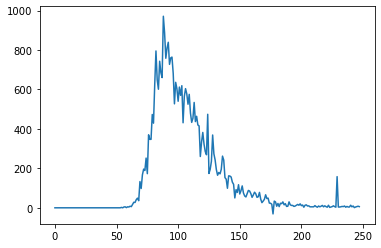

In [ ]:
covid_df.new_deaths.plot()

In [ ]:
covid_df.set_index('month',inplace=True)
covid_df

,new_cases,new_deaths,new_tests,year,day,weekday,location
month,,,,,,,
12,0.0,0.0,NaN,2019,31,1,Italy
1,0.0,0.0,NaN,2020,1,2,Italy
1,0.0,0.0,NaN,2020,2,3,Italy
1,0.0,0.0,NaN,2020,3,4,Italy
1,0.0,0.0,NaN,2020,4,5,Italy
...,...,...,...,...,...,...,...
8,1444.0,1.0,53541.0,2020,30,6,Italy
8,1365.0,4.0,42583.0,2020,31,0,Italy
9,996.0,6.0,54395.0,2020,1,1,Italy


<AxesSubplot:xlabel='month'>

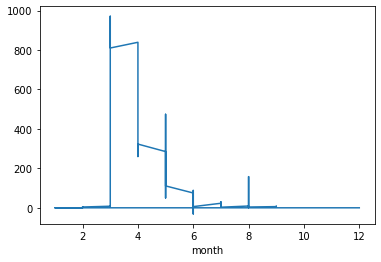

In [ ]:
covid_df.new_deaths.plot()

<AxesSubplot:>

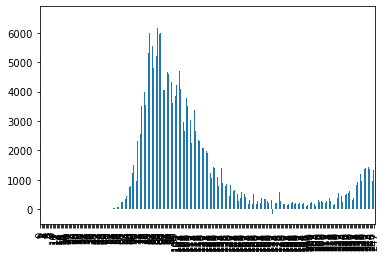

In [25]:
covid_df.new_cases.plot(kind="bar")

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

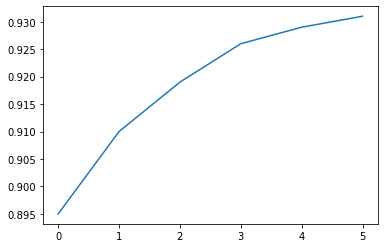

In [30]:
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
plt.plot(yield_apples)

In [31]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]

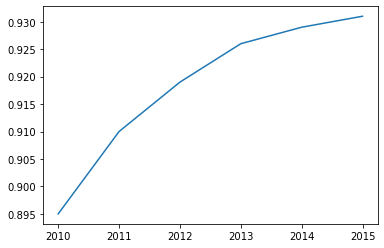

In [32]:
plt.plot(years,yield_apples);

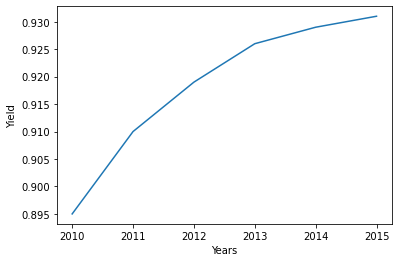

In [33]:
plt.xlabel("Years");
plt.ylabel("Yield");
plt.plot(years,yield_apples);

<Figure size 576x576 with 0 Axes>

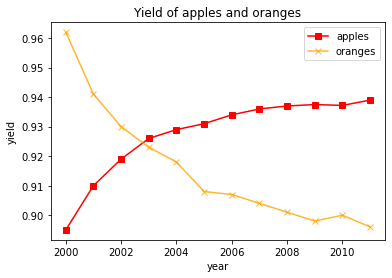

<Figure size 576x576 with 0 Axes>

In [34]:
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896, ]
plt.plot(years,apples,marker="s",c="r");
plt.plot(years,oranges,marker="x",c="orange",alpha=0.8);
plt.title('Yield of apples and oranges');
plt.xlabel('year');
plt.ylabel('yield');
plt.legend(["apples","oranges"]);
plt.figure(figsize=(8,8));


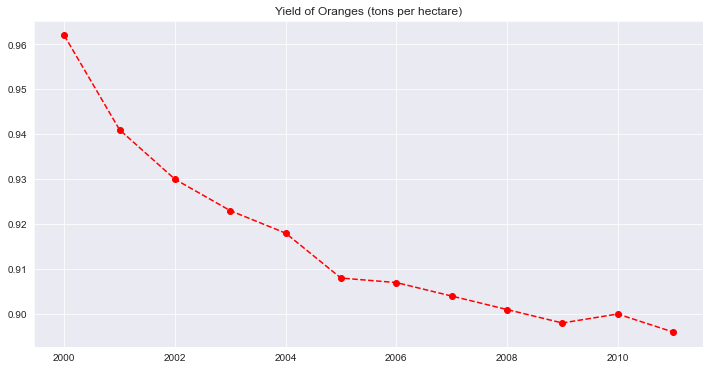

In [55]:
plt.figure(figsize=(12, 6))

plt.plot(years, oranges, '--or')
plt.title("Yield of Oranges (tons per hectare)");

In [36]:
sns.set_style('whitegrid')

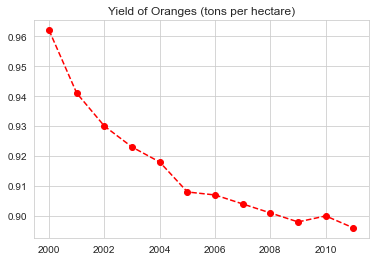

<Figure size 288x576 with 0 Axes>

In [37]:
plt.plot(years, oranges, 'o--r')
plt.title("Yield of Oranges (tons per hectare)");
plt.figure(figsize=(4,8));

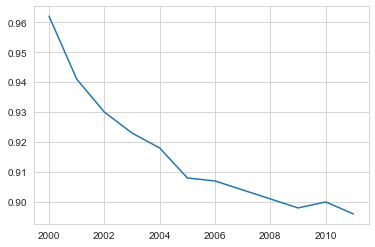

In [38]:
sns.lineplot(x=years,y=oranges);
sns.set_style("dark");

In [39]:
flowers_df = sns.load_dataset("iris")
flowers_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
flowers_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

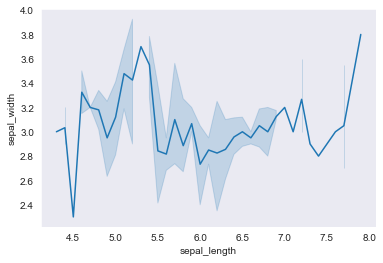

In [41]:
sns.lineplot(x=flowers_df.sepal_length,y=flowers_df.sepal_width)

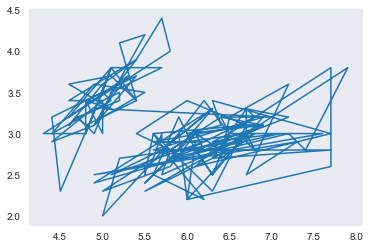

In [42]:
plt.plot(flowers_df.sepal_length,flowers_df.sepal_width);

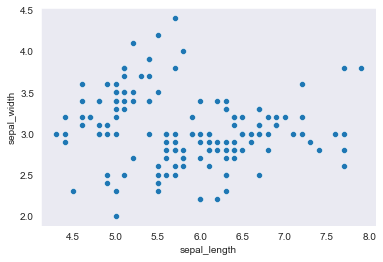

In [43]:
sns.scatterplot(x=flowers_df.sepal_length,y=flowers_df.sepal_width);
sns.set_style("darkgrid")

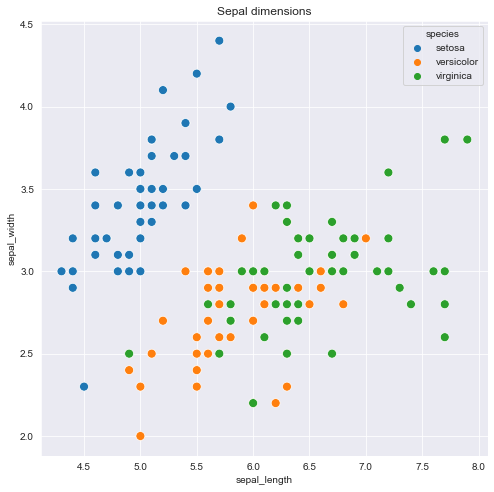

In [57]:
plt.figure(figsize=(8,8));
plt.title("Sepal dimensions");
sns.scatterplot(x=flowers_df.sepal_length,y=flowers_df.sepal_width,hue=flowers_df.species,s=80);

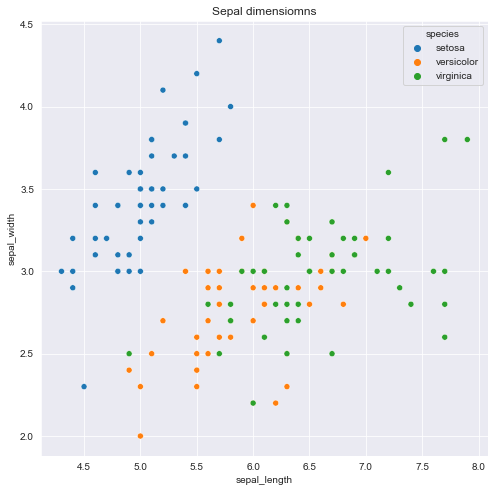

In [45]:
plt.figure(figsize=(8,8));
plt.title("Sepal dimensiomns");
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=flowers_df);

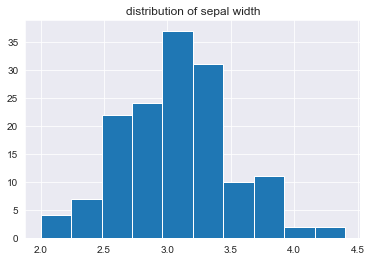

In [46]:
plt.title("distribution of sepal width");
plt.hist(flowers_df.sepal_width);

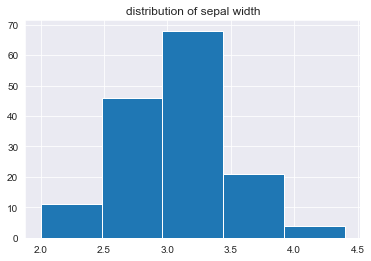

In [47]:
plt.title("distribution of sepal width");
plt.hist(flowers_df.sepal_width,bins=5);

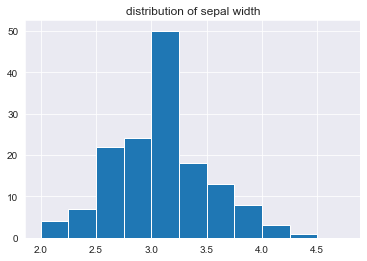

In [48]:
plt.title("distribution of sepal width");
plt.hist(flowers_df.sepal_width,bins=np.arange(2,5,0.25));

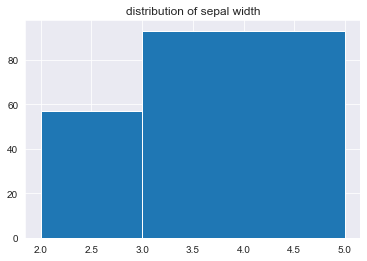

In [49]:
plt.title("distribution of sepal width");
plt.hist(flowers_df.sepal_width,bins=[2,3,5]);

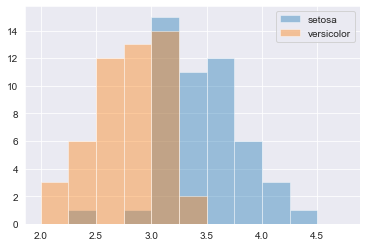

In [50]:
setosa_df = flowers_df[flowers_df.species=="setosa"]
versicolor_df = flowers_df[flowers_df.species=="versicolor"]
virginica_df = flowers_df[flowers_df.species=="virginica"]
plt.hist(setosa_df.sepal_width,alpha=0.4,bins=np.arange(2,5,0.25));
plt.hist(versicolor_df.sepal_width,alpha=0.4,bins=np.arange(2,5,0.25));
plt.legend(["setosa","versicolor"]);

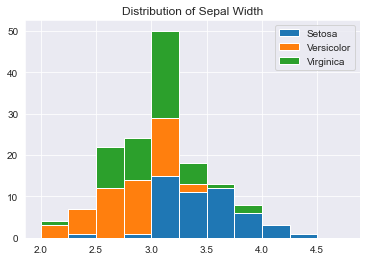

In [51]:
plt.title('Distribution of Sepal Width')

plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

plt.legend(['Setosa', 'Versicolor', 'Virginica']);

In [52]:
flowers_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [58]:
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

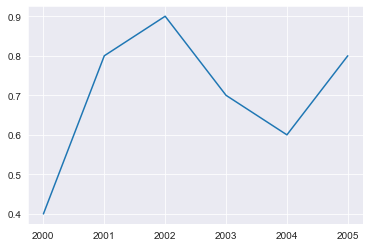

In [59]:
plt.plot(years,oranges)

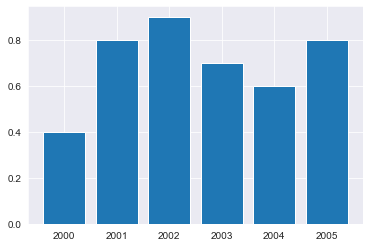

In [60]:
plt.bar(years,oranges);

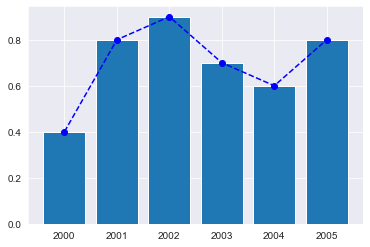

In [61]:
plt.bar(years,oranges);
plt.plot(years,oranges,"o--b");

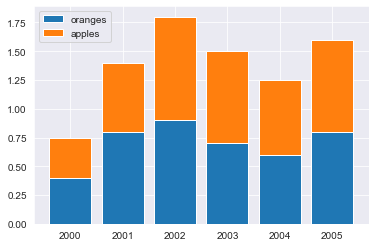

In [63]:
plt.bar(years,oranges);
plt.bar(years,apples,bottom=oranges);
plt.legend(["oranges","apples"]);

In [65]:
tips_df=sns.load_dataset("tips")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


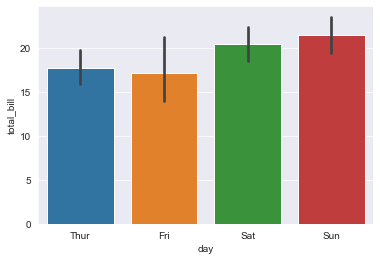

In [85]:
sns.barplot(x="day",y="total_bill",data=tips_df);

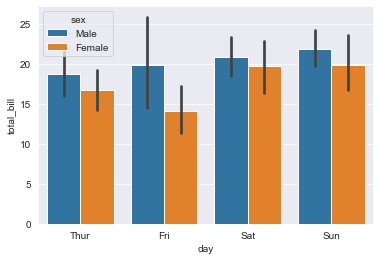

In [67]:
sns.barplot(x="day",y="total_bill",hue="sex",data=tips_df);

In [70]:
flight_df= sns.load_dataset("flights")
flight_df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [73]:
flight_matrix=flight_df.pivot("month","year","passengers")

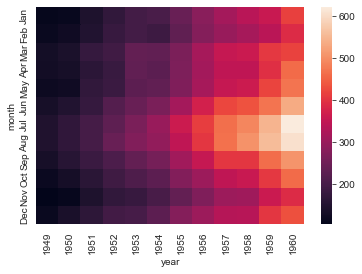

In [75]:
sns.heatmap(flight_matrix);

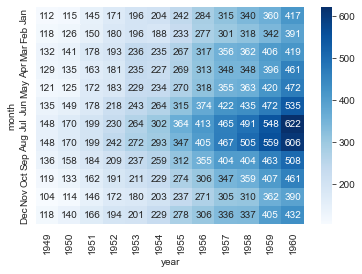

In [81]:
sns.heatmap(flight_matrix,fmt="d",annot=True,cmap="Blues"); #annot mentions values, cmap changes color pallete

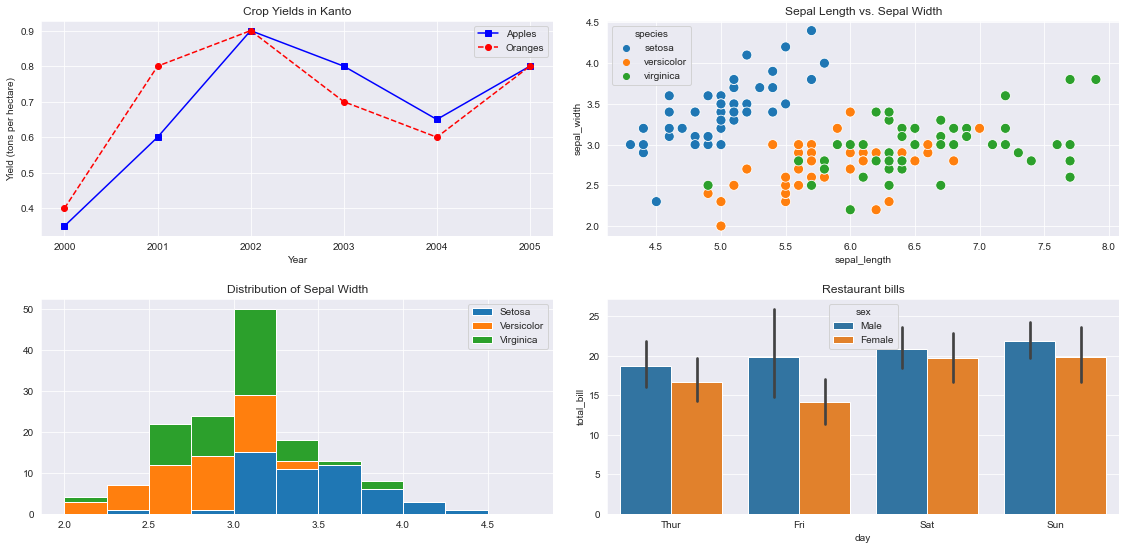

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Use the axes for plotting
axes[0,0].plot(years, apples, 's-b')
axes[0,0].plot(years, oranges, 'o--r')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Yield (tons per hectare)')
axes[0,0].legend(['Apples', 'Oranges']);
axes[0,0].set_title('Crop Yields in Kanto')


# Pass the axes into seaborn
axes[0,1].set_title('Sepal Length vs. Sepal Width')
sns.scatterplot(x=flowers_df.sepal_length, 
                y=flowers_df.sepal_width, 
                hue=flowers_df.species, 
                s=100, 
                ax=axes[0,1]);

# Use the axes for plotting
axes[1,0].set_title('Distribution of Sepal Width')
axes[1,0].hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

axes[1,0].legend(['Setosa', 'Versicolor', 'Virginica']);

# Pass the axes into seaborn
axes[1,1].set_title('Restaurant bills')
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df, ax=axes[1,1]);


plt.tight_layout(pad=2);